In [42]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import trange

from coin import COIN
from coin_old import COIN as COIN_old

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
retention_values = np.linspace(0.8, 1, 500, endpoint=True)
drift_values = np.linspace(-0.1, 0.1, 500, endpoint=True)
state_values = np.linspace(-1.5, 1.5, 500, endpoint=True)
bias_values = np.linspace(-1.5, 1.5, 500, endpoint=True)
state_feedback_values = np.linspace(-1.5, 1.5, 500, endpoint=True)

store = [
    "state_feedback", "motor_output", "responsibilities", 
]

coin_model = COIN(
    retention_values=retention_values, 
    drift_values=drift_values, 
    state_values=state_values, 
    bias_values=bias_values, 
    state_feedback_values=state_feedback_values, 
    store=store, 
    sample_crf_stirling=False, 
) # use default parameters for now
# coin_model = COIN()
coin_model.perturbations = np.concatenate([
    np.zeros((50, )), 
    np.ones((125, )), 
    -np.ones((15, )), 
    np.ones((150, )) * np.nan, 
])

output = coin_model.simulate_coin()

coin_model_old = COIN_old(
    retention_values=retention_values,
    drift_values=drift_values,
    state_values=state_values,
    bias_values=bias_values,
    state_feedback_values=state_feedback_values,
    store=store,
)  # use default parameters for now

coin_model_old.perturbations = np.concatenate([
    np.zeros((50, )),
    np.ones((125, )),
    -np.ones((15, )),
    np.ones((150, )) * np.nan,
])
output_old = coin_model_old.simulate_coin()

Simulting the COIN model


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:02<00:00,  2.10s/it]


Simulting the COIN model


100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


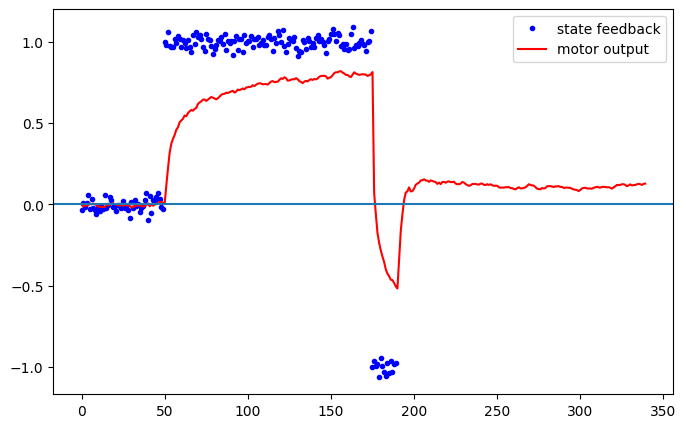

In [40]:
plt.figure(figsize=(8, 5))
plt.plot(output["runs"][0]["state_feedback"], "b.", label="state feedback")
plt.plot(output["runs"][0]["motor_output"], "r", label="motor output")
plt.legend()
plt.axhline(0)

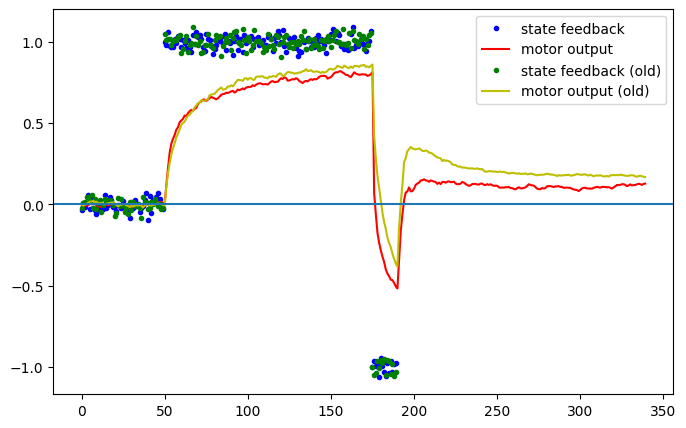

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(output["runs"][0]["state_feedback"], "b.", label="state feedback")
plt.plot(output["runs"][0]["motor_output"], "r", label="motor output")

plt.plot(output_old["runs"][0]["state_feedback"], "g.", label="state feedback (old)")
plt.plot(output_old["runs"][0]["motor_output"], "y", label="motor output (old)")

plt.legend()
plt.axhline(0)

In [46]:
state_feedback_new = []
motor_output_new = []
state_feedback_old = []
motor_output_old = []

with trange(10, dynamic_ncols=True) as pbar:
    for i in pbar:
        retention_values = np.linspace(0.8, 1, 500, endpoint=True)
        drift_values = np.linspace(-0.1, 0.1, 500, endpoint=True)
        state_values = np.linspace(-1.5, 1.5, 500, endpoint=True)
        bias_values = np.linspace(-1.5, 1.5, 500, endpoint=True)
        state_feedback_values = np.linspace(-1.5, 1.5, 500, endpoint=True)

        store = [
            "state_feedback", "motor_output", "responsibilities", 
        ]

        coin_model = COIN(
            retention_values=retention_values, 
            drift_values=drift_values, 
            state_values=state_values, 
            bias_values=bias_values, 
            state_feedback_values=state_feedback_values, 
            store=store, 
            sample_crf_stirling=True, 
        ) # use default parameters for now
        # coin_model = COIN()
        coin_model.perturbations = np.concatenate([
            np.zeros((50, )), 
            np.ones((125, )), 
            -np.ones((15, )), 
            np.ones((150, )) * np.nan, 
        ])

        output = coin_model.simulate_coin()

        coin_model_old = COIN_old(
            retention_values=retention_values,
            drift_values=drift_values,
            state_values=state_values,
            bias_values=bias_values,
            state_feedback_values=state_feedback_values,
            store=store,
        )  # use default parameters for now

        coin_model_old.perturbations = np.concatenate([
            np.zeros((50, )),
            np.ones((125, )),
            -np.ones((15, )),
            np.ones((150, )) * np.nan,
        ])
        output_old = coin_model_old.simulate_coin()
        
        state_feedback_new.append(output["runs"][0]["state_feedback"])
        motor_output_new.append(output["runs"][0]["motor_output"])
        state_feedback_old.append(output_old["runs"][0]["state_feedback"])
        motor_output_old.append(output_old["runs"][0]["motor_output"])

  0%|          | 0/10 [00:00<?, ?it/s]

Simulting the COIN model


/Users/changminyu/Desktop/research/postdoc_CBL/remapping/codes/COIN/coin_python/coin.py:617: RuntimeWarning: divide by zero encountered in log
  p_c = np.log(coin_state["prior_probabilities"]) + np.log(coin_state["probability_state_feedback"])
/Users/changminyu/Desktop/research/postdoc_CBL/remapping/codes/COIN/coin_python/utils/general_utils.py:43: RuntimeWarning: divide by zero encountered in log
  log_weights = np.log(weights)
/Users/changminyu/Desktop/research/postdoc_CBL/remapping/codes/COIN/coin_python/utils/distribution_utils.py:234: RuntimeWarning: invalid value encountered in sqrt
  c = 1.0 / np.sqrt(9*d)
/Users/changminyu/Desktop/research/postdoc_CBL/remapping/codes/COIN/coin_python/coin.py:624: RuntimeWarning: divide by zero encountered in log
  p_c = np.log(coin_state["prior_probabilities"])
100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


Simulting the COIN model


/Users/changminyu/Desktop/research/postdoc_CBL/remapping/codes/COIN/coin_python/coin_old.py:600: RuntimeWarning: divide by zero encountered in log
  p_c = np.log(coin_state["prior_probabilities"]) + np.log(coin_state["probability_state_feedback"])
/Users/changminyu/Desktop/research/postdoc_CBL/remapping/codes/COIN/coin_python/coin_old.py:607: RuntimeWarning: divide by zero encountered in log
  p_c = np.log(coin_state["prior_probabilities"])
 10%|█         | 1/10 [00:05<00:53,  5.93s/it]

Simulting the COIN model


100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


Simulting the COIN model


 20%|██        | 2/10 [00:10<00:40,  5.10s/it]

Simulting the COIN model


100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


Simulting the COIN model


 30%|███       | 3/10 [00:16<00:38,  5.49s/it]

Simulting the COIN model


100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Simulting the COIN model


 40%|████      | 4/10 [00:21<00:31,  5.20s/it]

Simulting the COIN model


100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


Simulting the COIN model


 50%|█████     | 5/10 [00:25<00:24,  4.92s/it]

Simulting the COIN model


100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


Simulting the COIN model


 60%|██████    | 6/10 [00:30<00:19,  4.83s/it]

Simulting the COIN model


100%|██████████| 1/1 [00:02<00:00,  2.51s/it]


Simulting the COIN model


 70%|███████   | 7/10 [00:35<00:14,  4.83s/it]

Simulting the COIN model


100%|██████████| 1/1 [00:02<00:00,  2.85s/it]


Simulting the COIN model


 80%|████████  | 8/10 [00:40<00:09,  4.99s/it]

Simulting the COIN model


100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


Simulting the COIN model


 90%|█████████ | 9/10 [00:45<00:05,  5.13s/it]

Simulting the COIN model


100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


Simulting the COIN model


100%|██████████| 10/10 [00:50<00:00,  5.04s/it]


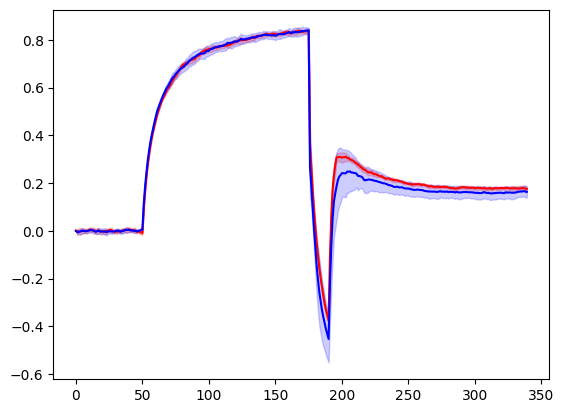

In [50]:
plt.plot(np.array(motor_output_new).mean(0), "r", label="motor output (new)")
plt.fill_between(
    np.arange(len(motor_output_new[0])),
    np.array(motor_output_new).mean(0) - np.array(motor_output_new).std(0),
    np.array(motor_output_new).mean(0) + np.array(motor_output_new).std(0),
    color="r",
    alpha=0.2,
)
plt.plot(np.array(motor_output_old).mean(0), "b", label="motor output (old)")
plt.fill_between(
    np.arange(len(motor_output_old[0])),
    np.array(motor_output_old).mean(0) - np.array(motor_output_old).std(0),
    np.array(motor_output_old).mean(0) + np.array(motor_output_old).std(0),
    color="b",
    alpha=0.2,
)